<a href="https://colab.research.google.com/github/ShashiAdhikari/DeepLearning/blob/master/SubjectClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
import os
import pandas as pd

In [5]:
classe = []
r = []
path1='/content/gdrive/MyDrive/New Data/Final_Data/nspam_sub_txt/'
path2='/content/gdrive/MyDrive/New Data/Final_Data/spam_sub_txt/'

In [6]:
#Counting the total filesin each folder
import os
count = 0
d = '/content/gdrive/MyDrive/New Data/Final_Data/spam_sub_txt'
for path in os.listdir(d):
    if os.path.isfile(os.path.join(d, path)):
        count += 1
print (count)

1000


In [7]:
d1 =[ path1+i for i in os.listdir(path1)]
d2 =[ path2+i for i in os.listdir(path2)]

In [8]:
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
stopwords_default = stopwords.words('english')

#stopwords_default.extend(['Gmail', 'Shashi','Adhikari','adhikaris2','@','udayton.edu','NIKUNJ', 'MANDANI', '<', 'nikunj.mandani', 'gmail.com','>','\x00\x1a', '\x1a', '\x1a', '\x1a\x1a', '\x1a', '\x1a', '\x1a', '\x1a', '\x1a', '\x1a\x1a', ',', '\x1a\x1a\x1a', '\x1a', '\x1a\x1a\x1a\x1a', '\x1a\x1a', '\x1a', '\x1a\x1a', '\x1a\x1a\x1a', '\x1a', '\x1a', '\x1a\x1a', '\x1a', '\x1a', '\x1a\x1a\x1a\x1a', '\x1a', '\x1a', '\x1a', '\x1a\x1a\x1a', '\x1a', '\x1a', '1', 'message', '\x1a', '\x1a', '\x1a', '\x1a', '\x1a', '\x1a\x1a', '<', 'info', 'e.decorx.in', '>', 'Wed', ',', 'Aug', '19', ',', '2020', '9:19', 'AM', 'Reply-To', ':', '\x1a', '\x1a', '\x1a', '\x1a', '\x1a', '\x1a\x1a', '<', 'info', 'e.decorx.in', '>', 'To', ':', '``', 'nikunjmandani', 'gmail.com', "''", '<', 'nikunjmandani', 'gmail.com', '>', 'Hello', 'nikunjmandani', 'gmail.com', ',', '\x00', '\x1a', '\x1a', '\x1a', '\x1a', '\x1a', '\x1a', '\x1a', '\x1a', '\x1a', '\x1a', '\x1a', '\x1a', ',', '\x1a', '\x1a', '\x1a', '\x1a', '\x1a', '\x1a', '\x1a', '\x1a', '\x1a', '\x1a', '\x1a', '\x1a', '\x1a', '\x1a', '\x1a', '\x1a', '\x1a', '\x1a', '\x1a', '\x1a', '\x1a', '\x1a', '\x1a', '\x1a', '\x1a', '\x1a', '\x1a', '\x1a', '\x1a', '\x1a', '\x1a', '\x1a', '\x1a', '\x1a', '\x1a\x1a', '\x00', '\x1a\x1a', '(', 'Tourism', ')', ',', '\x1a', '\x1a', '\x1a', '\x1a\x1a\x1a\x1a\x1a\x1a\x1a', '\x1a\x1a', '\x1a\x1a\x1a', '\x1a', '\x1a\x1a\x1a', '\x1a\x1a\x1a', '\x00', '\x1a\x1a', '\x1a', '\x1a', '\x1a', '\x1a\x1a\x1a', '\x1a', '\x1a\x1a', '\x1a\x1a', '\x1a', '\x1a', '\x1a', '\x1a', '\x1a', '\x1a\x1a', '\x1a\x1a', '\x1a', '\x1a\x1a', '\x1a\x1a\x1a', '\x1a\x1a', '\x1a\x1a\x1a\x1a', '\x1a\x1a\x1a', '\x1a', '\x1a', ',', '\x1a', '\x1a', '\x1a\x1a\x1a', '\x1a\x1a\x1a\x1a', '\x1a', '\x1a\x1a', '\x1a\x1a\x1a\x1a', '\x1a', '\x1a', '\x1a', '\x1a\x1a\x1a\x1a', '\x1a\x1a\x1a', '\x00', '\x1a', '\x1a', '\x1a\x1a\x1a\x1a', '\x1a', '\x1a', '\x1a\x1a\x1a', '\x1a', '\x1a\x1a', '\x00', '\x1a\x1a\x1a\x1a', '\x1a', '(', 'Most', 'Heated', 'Place', ')', '\x1a', '\x1a', '\x1a\x1a\x1a', '\x1a\x1a', '\x1a\x1a', '\x1a\x1a\x1a', '\x1a', '\x1a', '.', '\x1a\x1a', '\x1a', '\x00\x1a\x1a\x1a', '\x1a', '\x1a', '\x1a', '\x1a', '\x1a\x1a\x1a\x1a\x1a\x1a', '\x00', '\x1a\x1a', '(', 'California', ')', '\x1a', '\x00', '\x00\x00\x1a\x1a', '\x1a', '\x1a', '\x1a', '\x1a', '\x1a', '\x1a\x1a', '\x1a\x1a', '\x1a\x1a', '\x00', '\x1a', '\x00\x1a\x1a', '\x1a', '\x00', '16', '\x1a\x1a\x00', '\x1a\x1a', '\x1a\x1a\x1a\x1a\x1a', '3:41', '\x1a\x1a', '\x1a', '54.4', '\x1a\x1a\x00\x1a', '\x1a', '\x1a', '\x00\x00\x1a\x1a', '\x1a\x1a', '129.9', '\x1a\x1a\x00\x1a', '\x1a\x1a\x1a', '\x1a', '\x1a\x1a\x1a\x1a\x1a', '\x1a\x1a\x1a\x1a\x1a\x1a', '\x1a\x1a', '\x00', '\x1a\x1a\x1a\x1a', '\x1a\x1a\x1a', '.', '\x1a\x1a\x1a', '\x1a\x1a', '\x1a', '\x1a', '\x00', '\x1a\x1a', '\x1a\x1a\x1a\x1a', '\x1a', '\x1a', '\x1a\x1a', '\x1a\x1a', '\x1a', '\x1a', '\x1a\x1a\x1a\x1a', '\x1a', '\x00', '\x1a\x1a\x1a', '\x1a', '\x00\x1a\x1a\x1a', '\x1a\x1a', '\x00', '\x1a\x1a\x1a\x1a\x1a\x1a', '\x1a\x1a\x1a\x1a', '\x1a\x1a\x1a\x1a\x1a', '...', '...', '...', '...', '.', '\x1a\x1a\x1a\x1a', '\x1a\x1a\x1a\x1a', '\x1a\x1a', '\x00', '\x00', '\x1a', '\x1a', '\x1a', '\x1a', '\x1a', '\x1a', '\x1a', '\x1a', '\x1a', '\x1a', '\x1a', '\x1a', '\x1a', '\x1a', '\x1a', '\x1a', '\x1a', '\x1a', '\x1a', '?', '...', '...', '...', '.',])

#stopwords_default.extend(['Gmail', 'Shashi','Adhikari','NIKUNJ', 'MANDANI','nikunj.mandani', 'gmail.com'])
print(stopwords_default)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'ag

In [7]:
# Removing Stopword from list. This is for the non-spam
for filename in d2:
  if filename.split(".")[1]=='txt':
      
      file = open(filename,"r",encoding="utf-8",errors='ignore')
      rf=file.read()
      token = word_tokenize(rf) 
      filtered_sentence = [w for w in token if not w in stopwords_default]
      classe.append('spam')
      r.append(filtered_sentence)
      #print(r)
      
#For the SPAM
for filename in d1:
  if filename.split(".")[1] =='txt':
    file = open(filename,'rb')
    rf=file.read()
    #print(rf)

    classe.append('nonspam')
    r.append(rf)
    

df = pd.DataFrame({
    'f':r,
    'c': classe
})
df.head()

df.to_csv(r'/content/FileNameSubject(1).csv',index = True)

In [9]:
import nltk 
nltk.download('punkt')
import re 
import numpy as np 
word2count = {} 
for filename in d2:
  if filename.split(".")[1]=='txt':
      
      file = open(filename,"r",encoding="utf-8",errors='ignore')
      rf=file.read()
      words = nltk.word_tokenize(rf) 
  for word in words: 
        if word not in word2count.keys(): 
            word2count[word] = 1
        else: 
            word2count[word] += 1
            


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [21]:
print(word2count)
#r.append(word2count)



{'Massive': 1, 'discounts': 6, 'on': 62, 'backpacks': 1, ':': 118, '$': 186, '7': 3, 'Sports': 2, 'Backpacks': 2, ',': 318, '12': 2, 'High': 4, 'Tech': 5, 'Backpack': 1, '8': 46, 'Army': 1, 'Why': 3, 'everyone': 1, 'is': 35, 'wearing': 1, 'wooden': 1, 'jewelry': 1, 'this': 19, 'year': 1, '?': 68, '50': 15, '%': 56, 'off': 15, 'trending': 2, 'Wooden': 1, 'Watches': 3, 'Rings': 1, '...': 78, 'Giving': 1, 'away': 1, '200': 2, 'pairs': 1, 'of': 67, 'Waterproof': 2, 'Touch': 1, 'Screen': 2, 'Gloves': 3, 'right': 4, 'now': 21, '!': 117, '10': 49, 'minute': 42, 'monthly': 41, 'shoe': 41, 'clearance': 43, '5': 56, 'Sneakers': 41, '18': 43, 'Boots': 42, 'Sandals': 42, 'Only': 4, '@': 89, '10.99': 5, '-': 139, 'Identify': 1, 'The': 58, 'Path': 1, 'To': 15, 'Success': 2, 'With': 3, 'Your': 54, 'Janampatri': 2, 'Game': 2, 'Day': 12, 'Make': 6, 'your': 87, 'WFH': 1, 'more': 10, 'convenient': 1, 'Beautiful': 1, 'Weather': 2, '3D': 2, 'Paintings': 1, 'are': 12, 'OFF': 7, 'THE': 1, 'HOOK': 1, 'best': 

In [25]:
print('Name Age')
for name, age in word2count.items():
    print('{} {}'.format(name, age))

Name Age
Massive 1
discounts 6
on 62
backpacks 1
: 118
$ 186
7 3
Sports 2
Backpacks 2
, 318
12 2
High 4
Tech 5
Backpack 1
8 46
Army 1
Why 3
everyone 1
is 35
wearing 1
wooden 1
jewelry 1
this 19
year 1
? 68
50 15
% 56
off 15
trending 2
Wooden 1
Watches 3
Rings 1
... 78
Giving 1
away 1
200 2
pairs 1
of 67
Waterproof 2
Touch 1
Screen 2
Gloves 3
right 4
now 21
! 117
10 49
minute 42
monthly 41
shoe 41
clearance 43
5 56
Sneakers 41
18 43
Boots 42
Sandals 42
Only 4
@ 89
10.99 5
- 139
Identify 1
The 58
Path 1
To 15
Success 2
With 3
Your 54
Janampatri 2
Game 2
Day 12
Make 6
your 87
WFH 1
more 10
convenient 1
Beautiful 1
Weather 2
3D 2
Paintings 1
are 12
OFF 7
THE 1
HOOK 1
best 6
paintings 1
we 3
could 4
find 3
for 88
under 2
Enrich 1
Future 5
Without 1
Any 1
Obstacles 1
Upgrade 1
to 95
the 43
latest 1
Apple 4
gadgets 1
Just 8
a 59
giant 1
2020 20
TV 2
so 4
grab 1
Big 1
Smart 3
70 6
Rainy 1
Days 7
Watch 4
Roots 1
Papa 1
CJ 1
and 60
Swati 1
Pal 3
perform 1
cause 1
. 152
Give 5
home 12
makeover 1


In [28]:
import pandas as pd
df = pd.DataFrame(word2count.items(), columns=["word", "count"]) 
df

,word,count
0,Massive,1
1,discounts,6
2,on,62
3,backpacks,1
4,:,118
...,...,...
2380,Rs.490,1
2381,pm,1
2382,Proof,1
2383,Signature,1


word2count


NameError: ignored

In [14]:
import heapq 
import nltk 
import re 
import numpy as np 
freq_words = heapq.nlargest(100, word2count, key=word2count.get)
#print(freq_words)

In [ ]:
# Removing Stopword from list. This is for the non-spam
for filename in d2:
  if filename.split(".")[1]=='txt':
      
      file = open(filename,"r",encoding="utf-8",errors='ignore')
      rf=file.read()
      token = word_tokenize(rf) 
      filtered_sentence = [w for w in token if not w in stopwords_default]
      classe.append('spam')
      r.append(filtered_sentence)
      #print(r)
      word2count = {} 
for data in dataset: 
    words = nltk.word_tokenize(data) 
    for word in words: 
        if word not in word2count.keys(): 
            word2count[word] = 1
        else: 
            word2count[word] += 1
      
#For the SPAM
for filename in d1:
  if filename.split(".")[1] =='txt':
    file = open(filename,'rb')
    rf=file.read()
    #print(rf)

    classe.append('nonspam')
    r.append(rf)
    

df = pd.DataFrame({
    'f':r,
    'c': classe
})
df.head()

#df.to_csv(r'/content/FileNameSubject(1).csv',index = True)

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline  

In [16]:
data = pd.read_csv('/content/FileNameSubject.csv', encoding='latin-1')
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep]
clean_dataset(data)
data.head(n=80)

,Unnamed: 0,f,c
0,0,"['Massive', 'discounts', 'backpacks', ':', '$'...",spam
1,1,"['Why', 'everyone', 'wearing', 'wooden', 'jewe...",spam
2,2,"['Giving', 'away', '200', 'pairs', 'Waterproof...",spam
3,3,"['10', 'minute', 'monthly', 'shoe', 'clearance...",spam
4,4,"['Only', '@', '$', '10.99', '-', 'Identify', '...",spam
...,...,...,...
75,75,"['Acts', 'Kindness']",spam
76,76,"['10', 'minute', 'monthly', 'shoe', 'clearance...",spam
77,77,"['$', '8', 'Smart']",spam
78,78,[],spam


In [17]:
count1 = Counter(" ".join(data[data['c']=='nonspam']["f"]).split()).most_common(20)
df1 = pd.DataFrame.from_dict(count1)
df1 = df1.rename(columns={0: "words in non-spam", 1 : "count"})
count2 = Counter(" ".join(data[data['c']=='spam']["f"]).split()).most_common(20)
df2 = pd.DataFrame.from_dict(count2)
df2 = df2.rename(columns={0: "words in spam", 1 : "count_"})

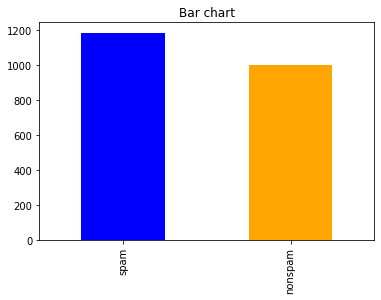

In [18]:
count_Class=pd.value_counts(data["c"], sort= True)
count_Class.plot(kind= 'bar', color= ["blue", "orange"])
plt.title('Bar chart')
plt.show()

In [19]:
data = data.rename(columns ={"c":"target", "f":"text"})
data.head()

,Unnamed: 0,text,target
0,0,"['Massive', 'discounts', 'backpacks', ':', '$'...",spam
1,1,"['Why', 'everyone', 'wearing', 'wooden', 'jewe...",spam
2,2,"['Giving', 'away', '200', 'pairs', 'Waterproof...",spam
3,3,"['10', 'minute', 'monthly', 'shoe', 'clearance...",spam
4,4,"['Only', '@', '$', '10.99', '-', 'Identify', '...",spam


In [20]:
count1 = Counter(" ".join(data[data['target']=='nonspam']["text"]).split()).most_common(30)
data1 = pd.DataFrame.from_dict(count1)
data1 = data1.rename(columns={0: "words of nonspam", 1 : "count"})
count2 = Counter(" ".join(data[data['target']=='spam']["text"]).split()).most_common(30)
data2 = pd.DataFrame.from_dict(count2)
data2 = data2.rename(columns={0: "words of spam", 1 : "count_"})

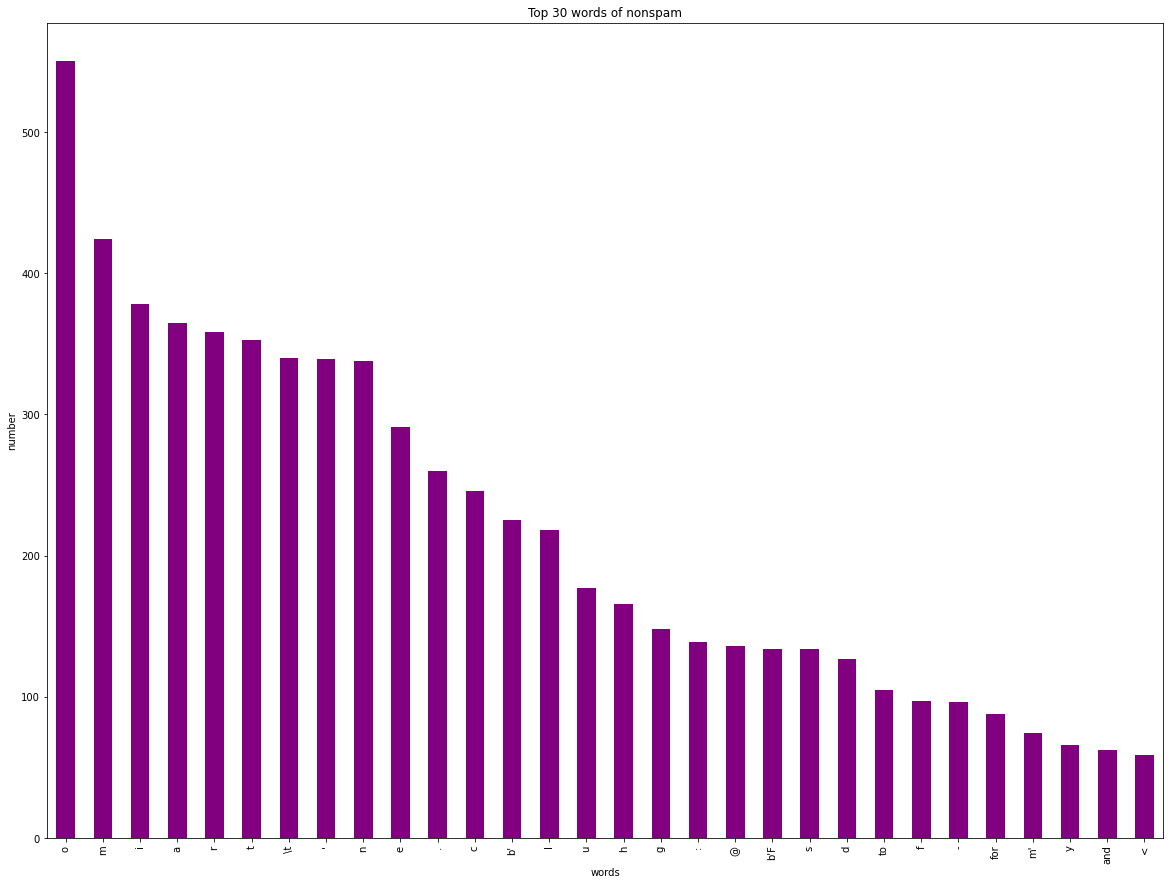

In [21]:
data1.plot.bar(legend = False, color = 'purple',figsize = (20,15))
y_pos = np.arange(len(data1["words of nonspam"]))
plt.xticks(y_pos, data1["words of nonspam"])
plt.title('Top 30 words of nonspam')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

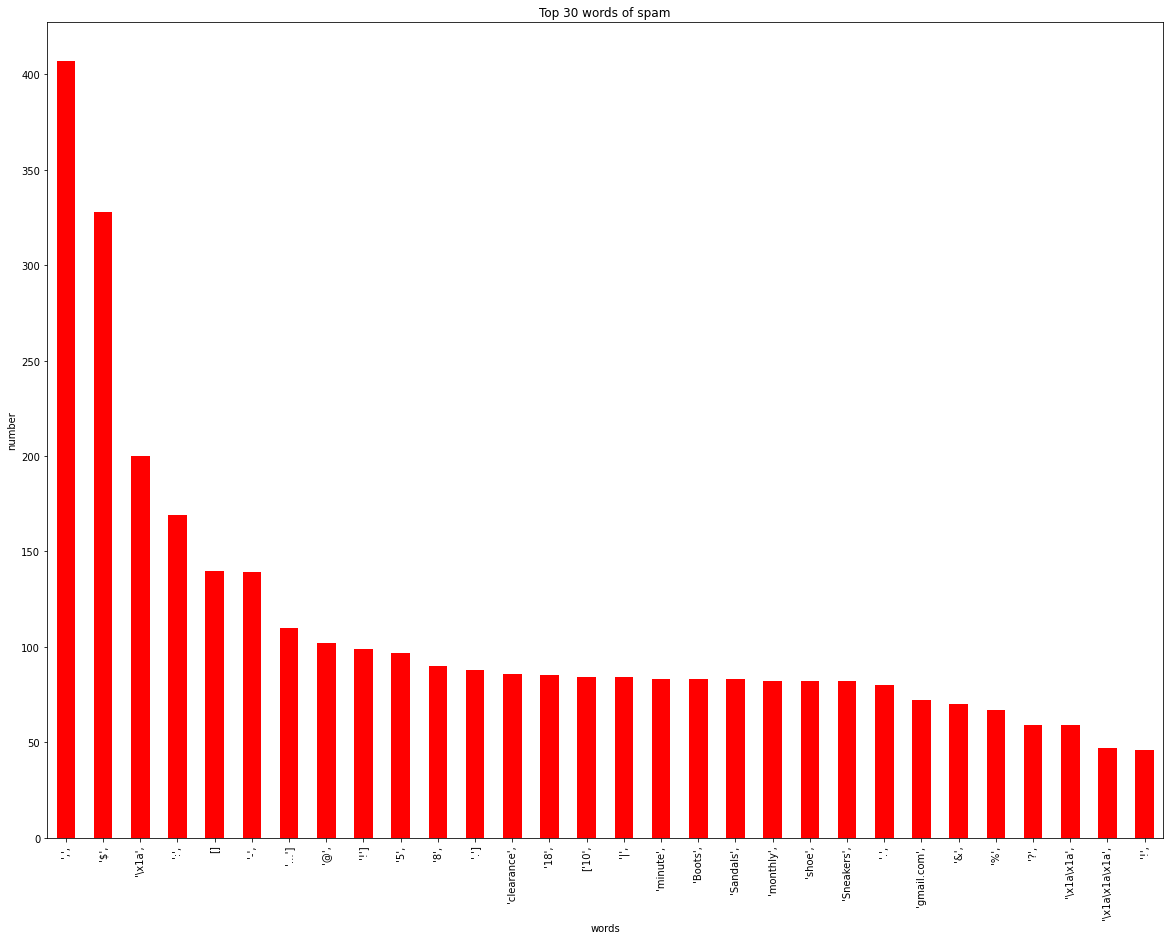

In [22]:
data2.plot.bar(legend = False, color = 'red',figsize = (20,15))
y_pos = np.arange(len(data2["words of spam"]))
plt.xticks(y_pos, data2["words of spam"])
plt.title('Top 30 words of spam')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

In [27]:
data = pd.read_csv('/content/FileNameSubject.csv')
data.head()

,Unnamed: 0,f,c
0,0,"['Massive', 'discounts', 'backpacks', ':', '$'...",spam
1,1,"['Why', 'everyone', 'wearing', 'wooden', 'jewe...",spam
2,2,"['Giving', 'away', '200', 'pairs', 'Waterproof...",spam
3,3,"['10', 'minute', 'monthly', 'shoe', 'clearance...",spam
4,4,"['Only', '@', '$', '10.99', '-', 'Identify', '...",spam


ValueError: ignored